<a href="https://colab.research.google.com/github/abignu/TFG/blob/master/Simulacion_SVM_restringido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#importamos Cancer dataset de las librerías de Sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

In [0]:
#cargamos dataset
data, target = load_breast_cancer(True)

sample_train, sample_test, label_train, label_test = train_test_split(data, target, test_size=0.3, random_state=12)

In [0]:
#aplico PCA para reducir la dimensión del dataset y quedarme con los dos features más importantes
#antes estandarizamos las variables
std_scale = StandardScaler().fit(sample_train)
sample_train = std_scale.transform(sample_train)
sample_test = std_scale.transform(sample_test)

# reducimos el número de features al número de qubits
pca = PCA(n_components=2).fit(sample_train)
sample_train = pca.transform(sample_train)
sample_test = pca.transform(sample_test)

In [0]:
#cargamos modelo
from sklearn.svm import SVC
svc_model = SVC()

#lo entrenamos
svc_model.fit(sample_train, label_train)

#hacemos predicción
y_predict = svc_model.predict(sample_test)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


            predicted_cancer  predicted_healthy
is_cancer                100                  7
is_healthy                 7                 57


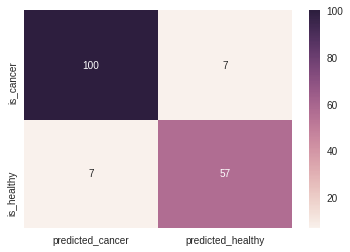

In [0]:
#una vez entrenado hacemos análisis
# Import metric libraries
from sklearn.metrics import classification_report, confusion_matrix

cm = np.array(confusion_matrix(label_test, y_predict, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is_cancer', 'is_healthy'],
                         columns=['predicted_cancer','predicted_healthy'])
print(confusion)
sns.heatmap(confusion,annot=True,fmt="d")

In [0]:
print(classification_report(label_test, y_predict))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        64
           1       0.93      0.93      0.93       107

   micro avg       0.92      0.92      0.92       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171

